In [0]:
%matplotlib inline

In [0]:
!pip install mxnet

     |████████████████████████████████| 25.4MB 90kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [0]:
!pip install gluoncv

     |████████████████████████████████| 512kB 9.1MB/s 


3. Test with DeepLabV3 Pre-trained Models
======================================

This is a quick demo of using GluonCV DeepLabV3 model on ADE20K dataset.
Please follow the `installation guide <../index.html>`_ to install MXNet and GluonCV if not yet.


In [0]:
import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv
# using cpu
ctx = mx.cpu(0)

Prepare the image
-----------------

download the example image



In [0]:
url = 'https://github.com/zhanghang1989/image-data/blob/master/encoding/' + \
    'segmentation/ade20k/ADE_val_00001755.jpg?raw=true'
filename = 'ade20k_example.jpg'
gluoncv.utils.download(url, filename, True)

14KB [00:00, 2034.45KB/s]             


'ade20k_example.jpg'

load the image



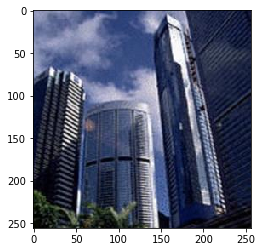

In [0]:
img = image.imread(filename)

from matplotlib import pyplot as plt
plt.imshow(img.asnumpy())
plt.show()

normalize the image using dataset mean



In [0]:
from gluoncv.data.transforms.presets.segmentation import test_transform
img = test_transform(img, ctx)

Load the pre-trained model and make prediction
----------------------------------------------

get pre-trained model



In [0]:
model = gluoncv.model_zoo.get_model('deeplab_resnet101_ade', pretrained=True)

Model file is not found. Downloading.


100121KB [00:04, 23013.33KB/s]                           


Model file is not found. Downloading.


100%|██████████| 221969/221969 [00:08<00:00, 26094.01KB/s]


make prediction using single scale



In [0]:
output = model.predict(img)
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()

Add color pallete for visualization



In [0]:
from gluoncv.utils.viz import get_color_pallete
import matplotlib.image as mpimg
mask = get_color_pallete(predict, 'ade20k')
mask.save('output.png')

show the predicted mask



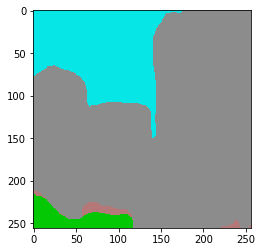

In [0]:
mmask = mpimg.imread('output.png')
plt.imshow(mmask)
plt.show()